# Keras API Project

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [2]:
import pandas as pd

In [4]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Section 1: Exploratory Data Analysis

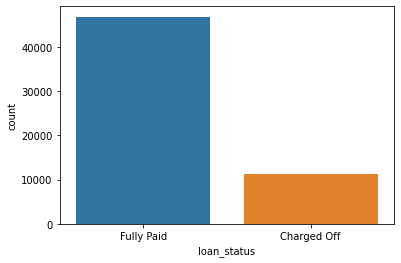

In [ ]:
sns.countplot(x='loan_status',data=df)

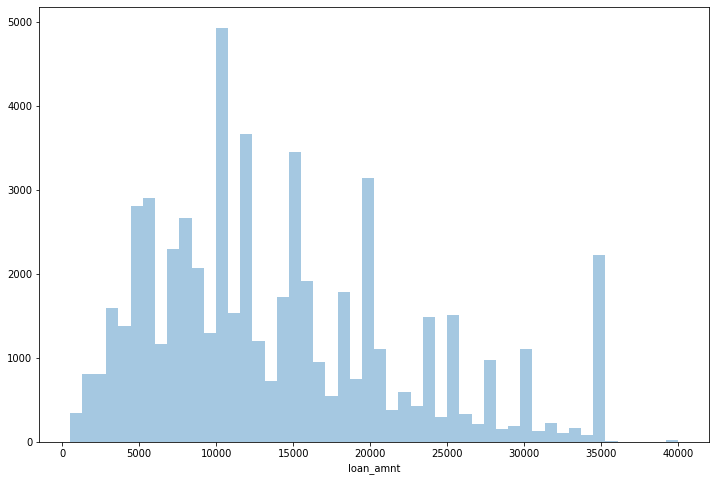

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],kde=False)

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.172652,0.953842,0.369035,0.030732,0.190978,-0.081280,0.336363,0.093989,0.217389,0.228743,-0.109854
int_rate,0.172652,1.000000,0.166293,-0.061784,0.177551,0.011063,0.063674,-0.005130,0.295756,-0.036461,-0.080152,0.058580
installment,0.953842,0.166293,1.000000,0.363848,0.029312,0.182210,-0.068886,0.324887,0.117745,0.196740,0.200501,-0.100517
annual_inc,0.369035,-0.061784,0.363848,1.000000,-0.196304,0.142105,-0.011236,0.314693,0.030780,0.202668,0.254526,-0.054788
dti,0.030732,0.177551,0.029312,-0.196304,1.000000,0.300081,-0.038848,0.142434,0.192291,0.225304,-0.054612,-0.026959
open_acc,0.190978,0.011063,0.182210,0.142105,0.300081,1.000000,-0.014481,0.226601,-0.134980,0.676210,0.111826,-0.023925
pub_rec,-0.081280,0.063674,-0.068886,-0.011236,-0.038848,-0.014481,1.000000,-0.110433,-0.082404,0.024281,0.015123,0.735019
revol_bal,0.336363,-0.005130,0.324887,0.314693,0.142434,0.226601,-0.110433,1.000000,0.237408,0.195367,0.201595,-0.129145
revol_util,0.093989,0.295756,0.117745,0.030780,0.192291,-0.134980,-0.082404,0.237408,1.000000,-0.104068,0.017485,-0.087417
total_acc,0.217389,-0.036461,0.196740,0.202668,0.225304,0.676210,0.024281,0.195367,-0.104068,1.000000,0.384316,0.046057


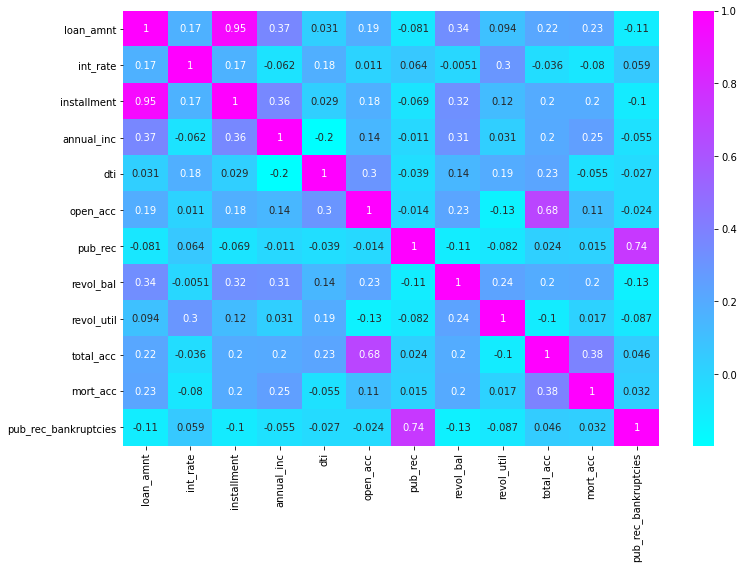

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='cool')

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


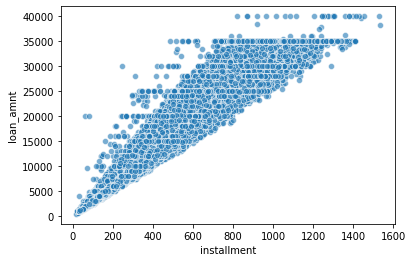

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,alpha=0.6)

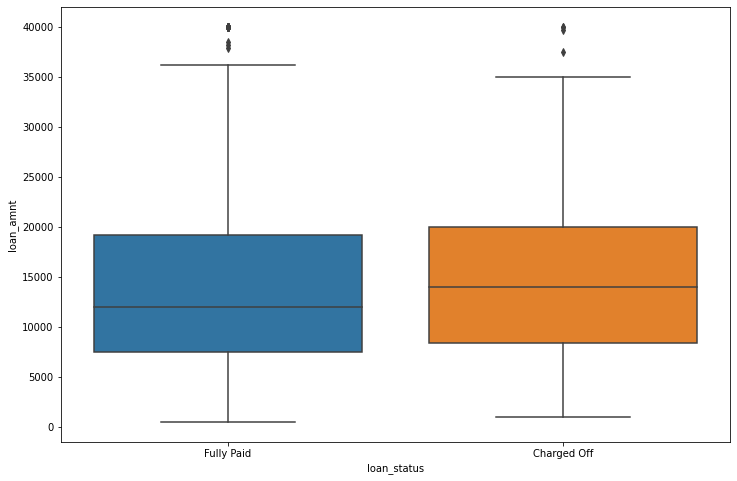

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,11366.0,15110.001320,8531.320514,1000.0,8406.25,14000.0,20000.0,40000.0
Fully Paid,46788.0,13860.096606,8298.730064,500.0,7500.00,12000.0,19200.0,40000.0


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].nunique()

35

In [10]:
for i in range(65,72):
  for j in range(1,6):
    print("'",chr(i),'',j,"'",sep='',end=",")
  print()

'A1','A2','A3','A4','A5',
'B1','B2','B3','B4','B5',
'C1','C2','C3','C4','C5',
'D1','D2','D3','D4','D5',
'E1','E2','E3','E4','E5',
'F1','F2','F3','F4','F5',
'G1','G2','G3','G4','G5',


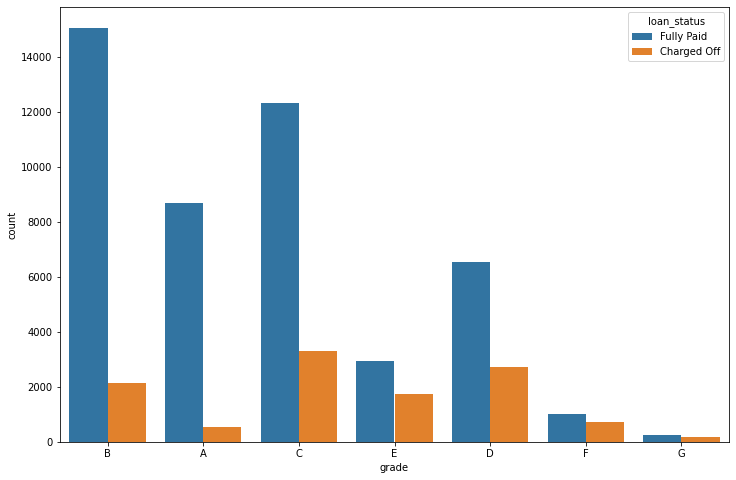

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['grade'],hue=df['loan_status'])

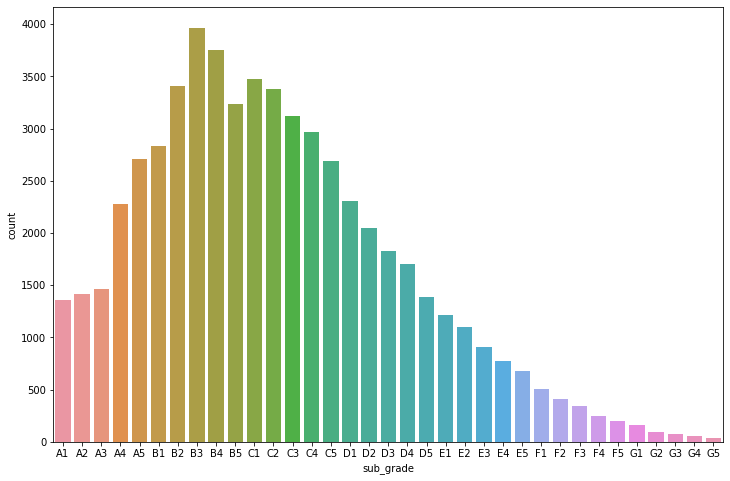

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'],order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

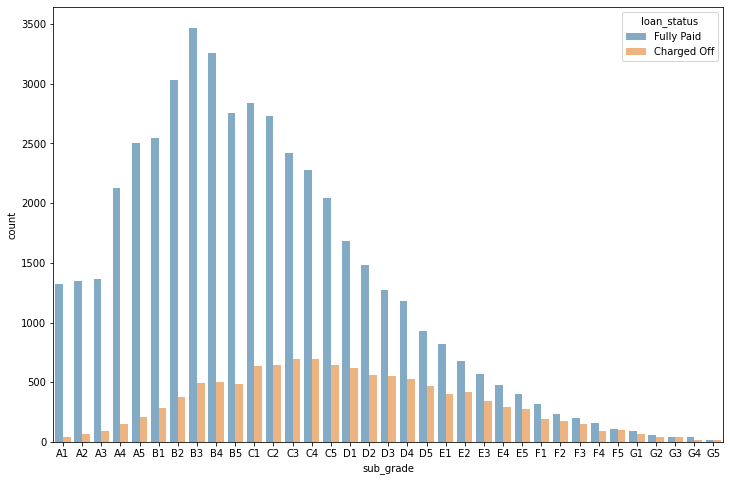

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'],order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'],
              hue=df['loan_status'],alpha=0.6)

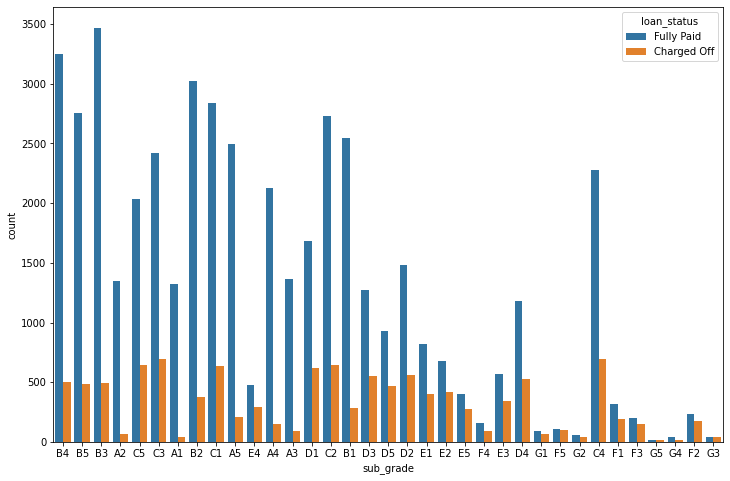

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'][0:-11],hue=df['loan_status'])

In [11]:
df['loan_repaid']=df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [13]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,Verified,Jun-2010,Fully Paid,debt_consolidation,Toxic Debt Payoff,8.32,Sep-1998,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\nBriannaton, AR 48052",1


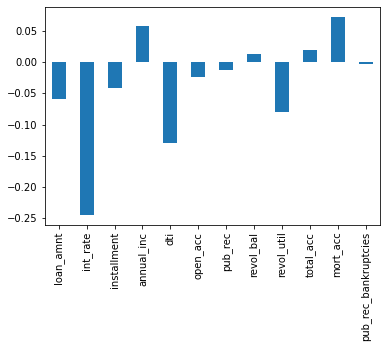

In [ ]:
df.corr()['loan_repaid'][:-1].plot(kind='bar')

# Data PreProcessing

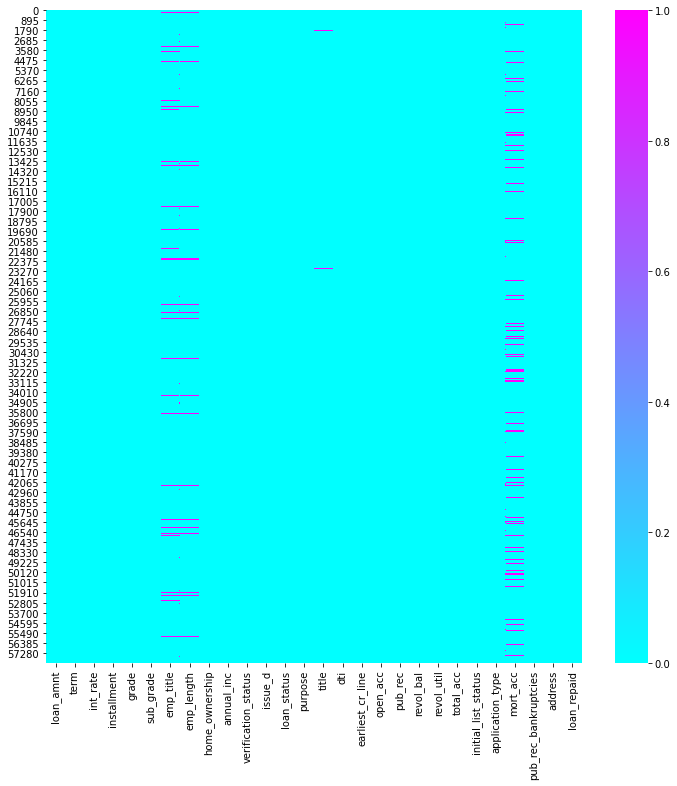

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(),cmap='cool')

In [ ]:
len(df.columns)

28

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [14]:
len(df)

396030

In [17]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [19]:
100*(df.isnull().sum())/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [21]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [22]:
df['emp_title'].nunique()

173105

In [24]:
df['emp_title'].value_counts()

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
The Par Group                          1
Senior instructor                      1
Program Performance Coordinator        1
help desk  support                     1
Associated Physicians Group            1
Name: emp_title, Length: 173105, dtype: int64

In [25]:
df=df.drop('emp_title',axis=1)

In [30]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
emp_length_order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

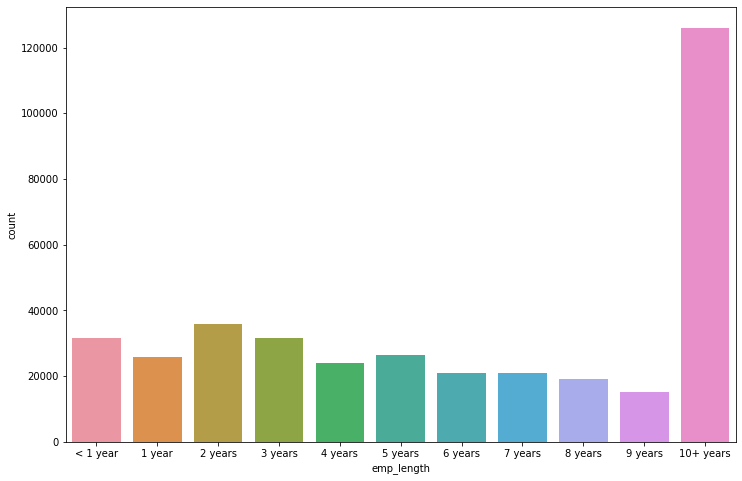

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(df['emp_length'],order=emp_length_order)

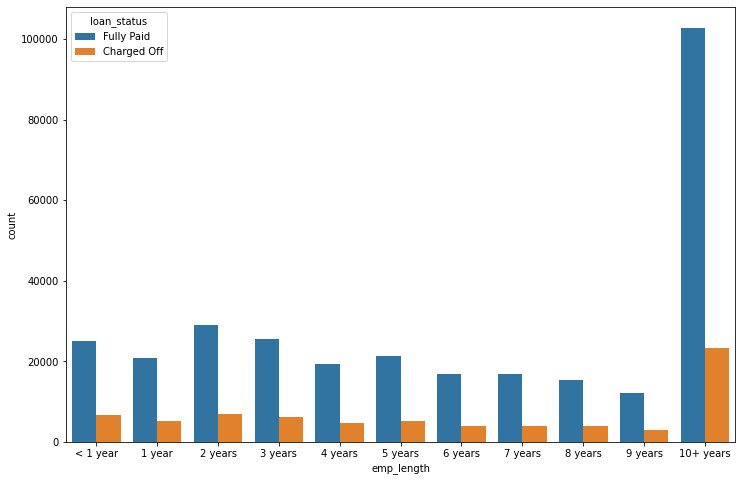

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(df['emp_length'],order=emp_length_order,hue=df['loan_status'])

In [37]:
emp_length_perc=[]

In [41]:
for i in emp_length_order:
  emp_length_perc.append(len(df[(df['emp_length']==i) & (df['loan_repaid']==0)])/len(df[df['emp_length']==i]))

In [42]:
emp_length_perc

[0.2068715524034673,
 0.19913453365273162,
 0.1932620649231027,
 0.19523132796462972,
 0.19238476953907815,
 0.19218720513304396,
 0.18919437646945925,
 0.1947740045151064,
 0.1997600166944908,
 0.2004701580253363,
 0.18418609817440357]

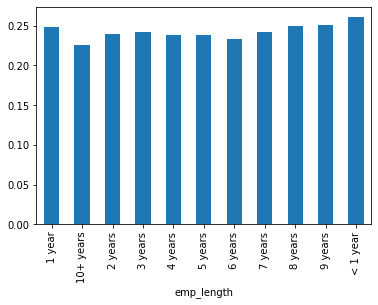

In [43]:
df.drop('emp_length',inplace=True,axis=1)

In [44]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [45]:
df.drop('title',inplace=True,axis=1)

In [47]:
feat_info('mort_acc')

Number of mortgage accounts.


In [48]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [50]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [54]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [57]:
def fill_mort_acc(total_acc,mort_acc):
  if(np.isnan(mort_acc)):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [58]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
df['mort_acc'].tail()

In [62]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [66]:
df['pub_rec_bankruptcies'].dropna(inplace=True)

In [68]:
df=df.dropna()

In [69]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [72]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

In [73]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [80]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [77]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [111]:
df['term']=df['term'].apply(lambda x: 36 if x==' 36 months' else 60)

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [82]:
df=df.drop('grade',axis=1)

In [85]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [86]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 

In [87]:
dummies=pd.get_dummies(df[ ['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

df=pd.concat([df.drop( ['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [88]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership

In [95]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [90]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [94]:
df['home_ownership']=df['home_ownership'].apply(lambda x:'OTHER' if ((x=='ANY') or (x=='NONE')) else x)

In [96]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [97]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address

In [101]:
df['zip_code']=df['address'].apply(lambda x:x.split()[-1])

In [102]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [103]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [104]:
df=df.drop('address',axis=1)

### issue_d 

In [105]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line

In [108]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x:int(x.split('-')[-1]))

In [109]:
df=df.drop('earliest_cr_line',axis=1)

In [112]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [115]:
df=df.drop('loan_status',axis=1)

In [116]:
X=df.drop('loan_repaid',axis=1).values

In [118]:
y=df['loan_repaid'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# OPTIONAL

## Grabbing a Sample for Training Time

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler=MinMaxScaler()

In [122]:
X_train=scaler.fit_transform(X_train)

In [123]:
X_test=scaler.transform(X_test)

# Creating the Model

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [126]:
X_train.shape

(316175, 78)

In [128]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [129]:
model.fit(X_train,y_train,epochs=25,batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2970 - val_loss: 0.2647
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2657 - val_loss: 0.2641
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2630 - val_loss: 0.2634
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2619 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2611 - val_loss: 0.2626
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2607 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2591 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2959 - val_loss: 0.2652
Epoch 2/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2652 - val_loss: 0.2643
Epoch 3/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2628 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2613 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2603 - val_loss: 0.2618
Epoch 7/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 3s 10us/sample - 

In [130]:
from tensorflow.keras.models import load_model

In [131]:
model.save('Loan_Status_model.h5')

# Section  Evaluating Model Performance

In [133]:
losses=pd.DataFrame(model.history.history)

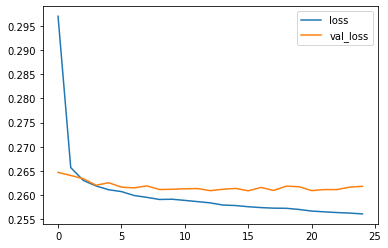

In [134]:
losses.plot()

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [150]:
predictions=model.predict_classes(X_test)

In [151]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [152]:
print(classification_report(y_test,predictions)
    ,confusion_matrix(y_test,predictions),sep='\n\n')

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044


[[ 6835  8823]
 [  102 63284]]


In [144]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [147]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [153]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [154]:
df.iloc[random_ind]['loan_repaid']

1.0